<a href="https://colab.research.google.com/github/kameda-yoshinari/IMISToolExeA2021/blob/main/400/430_DLfS_ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ゼロから作るDeep Learning ch03

In [ ]:
!echo "Change to the JST notation."
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime

Change to the JST notation.


In [ ]:
!echo "Start mounting your Google Drive."
from google.colab import drive 
drive.mount('/content/drive')
!echo "Make a working folder and move to there."
%cd /content/drive/My\ Drive/
%cd 202107_Tool-A/Work400/deep-learning-from-scratch-master
!ls -l

Start mounting your Google Drive.
Mounted at /content/drive
Make a working folder and move to there.
/content/drive/My Drive
/content/drive/My Drive/202107_Tool-A/Work400/deep-learning-from-scratch-master
total 44
drwx------ 2 root root 4096 Jul 26 00:07 ch01
drwx------ 2 root root 4096 Jul 26 00:07 ch02
drwx------ 2 root root 4096 Jul 26 00:07 ch03
drwx------ 2 root root 4096 Jul 26 00:07 ch04
drwx------ 2 root root 4096 Jul 26 00:07 ch05
drwx------ 2 root root 4096 Jul 26 00:07 ch06
drwx------ 2 root root 4096 Jul 26 00:07 ch07
drwx------ 2 root root 4096 Jul 26 00:07 ch08
drwx------ 2 root root 4096 Jul 26 00:07 common
drwx------ 2 root root 4096 Jul 26 00:07 dataset
-rw------- 1 root root 1078 Jul 26 00:06 LICENSE.md
-rw------- 1 root root 1924 Jul 26 00:06 README.md


In [ ]:
%cd ch03

/content/drive/My Drive/202107_Tool-A/Work400/deep-learning-from-scratch-master/ch03


---
# 3.2.3 step_function.py

In [ ]:
!python step_function.py

<Figure size 640x480 with 1 Axes>


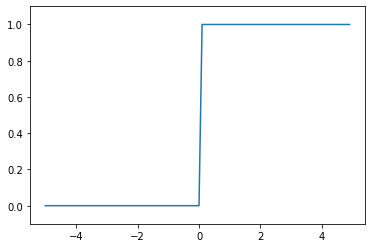

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()


# 3.2.4 sigmoid.py

In [ ]:
!python sigmoid.py

<Figure size 640x480 with 1 Axes>


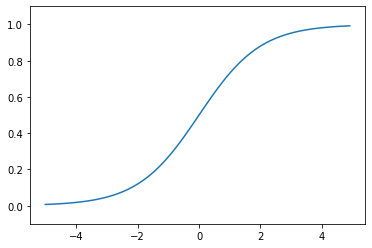

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


# 3.2.5 sig_step_compare.py

In [ ]:
!python sig_step_compare.py

<Figure size 640x480 with 1 Axes>


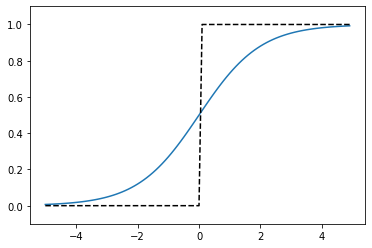

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()


# 3.2.7 relu.py

In [ ]:
!python relu.py

<Figure size 640x480 with 1 Axes>


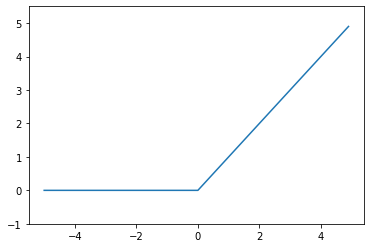

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


# 3.6.1 mnist.py

Mnist dataset on http://yann.lecun.com/exdb/mnist/ has gone.  
So just take the mirror provided by PyTorch (on AWS).  
=>See the url_base at line 14 in (new) mnist.py

**You should modify the dataset/mnist.py as it is **

Ref: 
https://stackoverflow.com/questions/66577151/http-error-when-trying-to-download-mnist-data

In [ ]:
%%writefile ../dataset/mnist.py
# New mnist.py
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np

#url_base = 'http://yann.lecun.com/exdb/mnist/'
url_base = 'https://ossci-datasets.s3.amazonaws.com/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()


Overwriting ../dataset/mnist.py


In [ ]:
!cat ../dataset/mnist.py

# New mnist.py
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np

#url_base = 'http://yann.lecun.com/exdb/mnist/'
url_base = 'https://ossci-datasets.s3.amazonaws.com/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(u

# 3.6.1 mnist_show.py

Since the PIL is not supported on google colaboratory for image display, you should use matplotlib (same as lena.png in 1.6.3)

In [ ]:
!python mnist_show.py

5
(784,)
(28, 28)


5
(784,)
(28, 28)


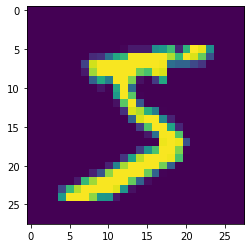

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
from matplotlib.image import imread # added


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show() # this does not work ...
    plt.imshow(pil_img) # added

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)


# 3.6.2 neuralnet_mnist.py




In [ ]:
!python neuralnet_mnist.py

Accuracy:0.9352


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


# 3.6.3 neuralnet_mnist_batch.py

In [ ]:
!python neuralnet_mnist_batch.py

Accuracy:0.9352


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


---
Tools for intelligent interaction systems a  
Master's and Docotal programs in intelligent and mechanical interaction systems, University of Tsukuba, Japan.  
KAMEDA Yoshinari, SHIBUYA Takeshi  

知能システムツール演習a  
知能機能システム学位プログラム (筑波大学大学院)  
担当：亀田能成，澁谷長史  

2021/07/26.  
